In [1]:
### Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time, datetime
%matplotlib inline

In [2]:
df = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [7]:
df['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

In [8]:
## df.rename(columns = {'START_DATE*':'START_DATE', 'END_DATE*':'END_DATE','CATEGORY*':'CATEGORY', 'START*': 'START','STOP*':'STOP', 'MILES*':'MILES','PURPOSE*':'PURPOSE'}, inplace = True)
df.columns = df.columns.str.replace("*","")

In [9]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [10]:
df.drop(index=1155,inplace = True)

In [11]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [12]:
pm= df.isnull().sum()*100 / len(df)
pm

START_DATE     0.000000
END_DATE       0.000000
CATEGORY       0.000000
START          0.000000
STOP           0.000000
MILES          0.000000
PURPOSE       43.463203
dtype: float64

In [13]:
df['PURPOSE'].fillna(method='ffill',inplace = True)

In [14]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [15]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors = 'coerce')

In [16]:
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors = 'coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [18]:
stop = df['STOP'].value_counts()

In [19]:
stop

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64

<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

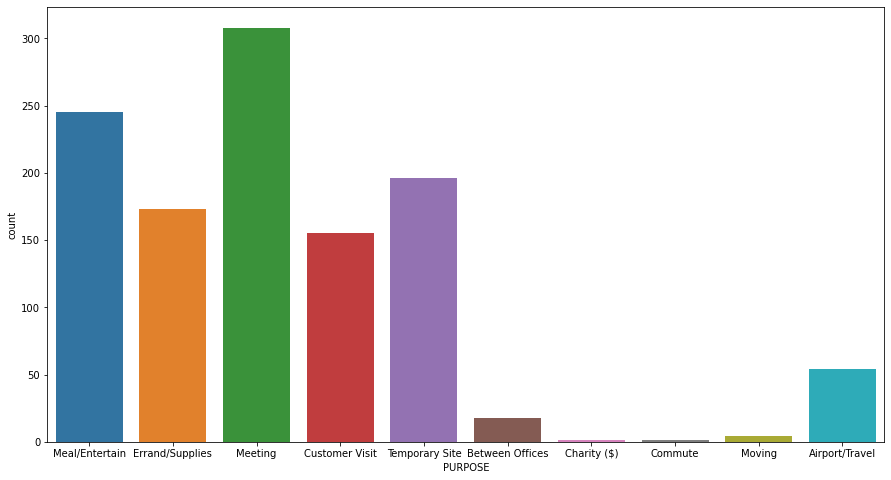

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(df['PURPOSE'])

In [21]:
miles = df.MILES.value_counts()

In [22]:
miles[miles>10]

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: MILES, dtype: int64

Text(0.5, 1.0, 'most frequent booked miles')

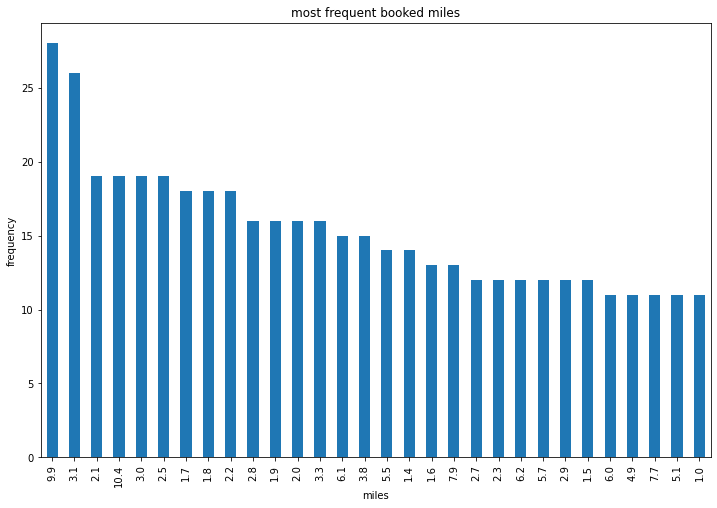

In [23]:
plt.figure(figsize=(12,8))
miles[miles>10].plot(kind='bar')
plt.xlabel('miles')
plt.ylabel('frequency')
plt.title('most frequent booked miles')

In [24]:
df['PURPOSE'].value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [25]:
df[df['MILES']>10]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10.8,Meeting
22,2016-01-12 16:02:00,2016-01-12 17:00:00,Business,New York,Queens County,15.1,Meeting
23,2016-01-13 13:54:00,2016-01-13 14:07:00,Business,Downtown,Gulfton,11.2,Meeting
...,...,...,...,...,...,...,...
1133,2016-12-29 09:44:00,2016-12-29 10:07:00,Business,Kar?chi,Unknown Location,11.6,Meal/Entertain
1134,2016-12-29 11:28:00,2016-12-29 12:00:00,Business,Unknown Location,Kar?chi,11.9,Meal/Entertain
1144,2016-12-29 23:14:00,2016-12-29 23:47:00,Business,Unknown Location,Kar?chi,12.9,Meeting
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting


In [26]:
df.groupby(['PURPOSE'])['MILES'].mean()

PURPOSE
Airport/Travel      14.953704
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      16.065806
Errand/Supplies      5.928902
Meal/Entertain       5.773878
Meeting             12.652597
Moving               4.550000
Temporary Site      11.016327
Name: MILES, dtype: float64

In [27]:
df.groupby(['PURPOSE']).agg({'MILES':['mean',max,min]})

MILES              
                       mean    max    min
PURPOSE                                  
Airport/Travel    14.953704  156.9    0.9
Between Offices   10.944444   39.2    1.9
Charity ($)       15.100000   15.1   15.1
Commute          180.200000  180.2  180.2
Customer Visit    16.065806  310.3    0.6
Errand/Supplies    5.928902  195.3    0.5
Meal/Entertain     5.773878   36.5    0.6
Meeting           12.652597  201.0    0.7
Moving             4.550000    6.1    3.3
Temporary Site    11.016327  195.6    0.7

<AxesSubplot:ylabel='PURPOSE'>

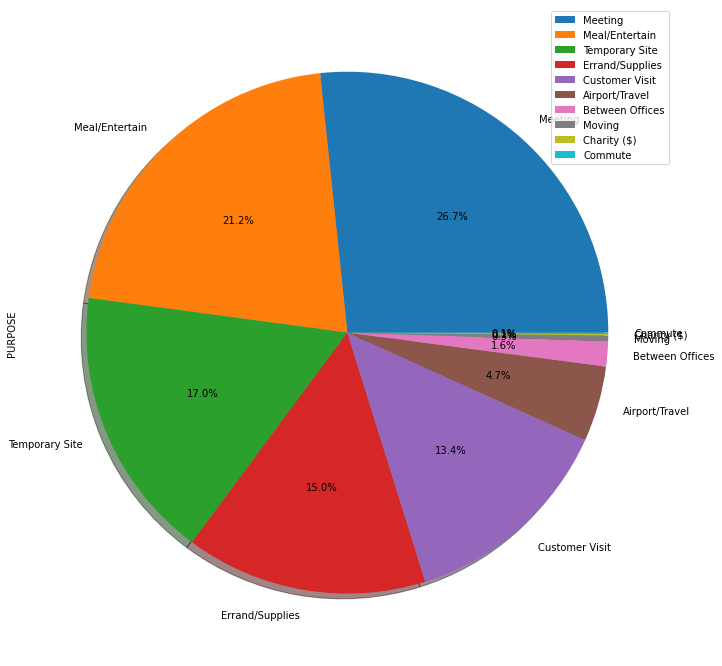

In [28]:
plt.figure(figsize=(12,12))
df['PURPOSE'].value_counts()[:11].plot(kind='pie',autopct='%1.1f%%',shadow=True,legend = True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

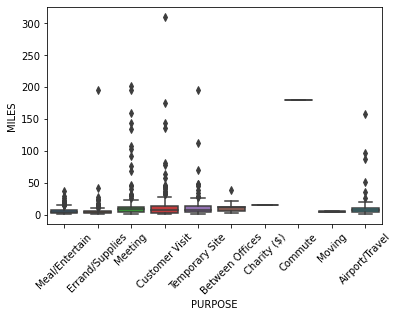

In [29]:
sns.boxplot(data=df,x=df.PURPOSE,y = df.MILES)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

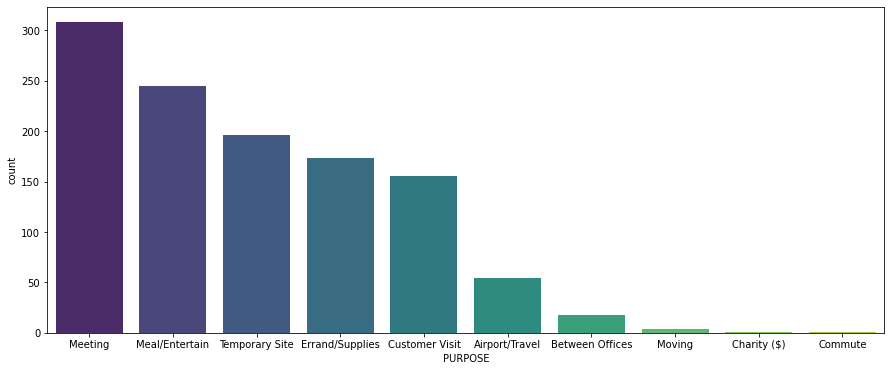

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'],order=df['PURPOSE'].value_counts().index,palette = 'viridis')

In [31]:
df['minutes'] = df.END_DATE - df.START_DATE

In [32]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00


In [33]:
df['minutes'] = df['minutes'].dt.total_seconds()/6

In [34]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,60.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,120.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,130.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,140.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,670.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,70.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,180.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,350.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,180.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
 7   minutes     1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 113.5+ KB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

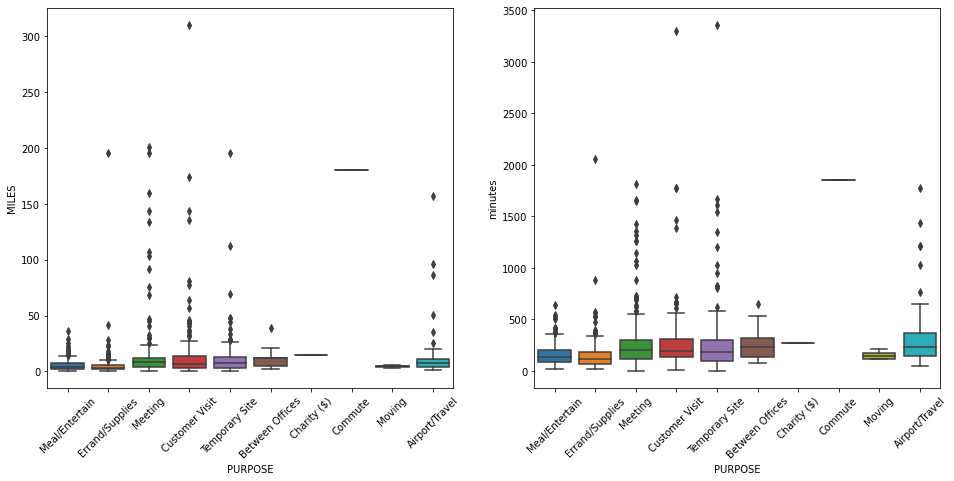

In [36]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data = df,x =df['PURPOSE'], y = df['MILES'])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data = df , x =df['PURPOSE'], y = df.minutes)
plt.xticks(rotation=45)

In [37]:
df['month'] = pd.DatetimeIndex(df['START_DATE']).month

In [38]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,60.0,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,120.0,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,130.0,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,140.0,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,670.0,1
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,70.0,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,180.0,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,350.0,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,180.0,12


In [39]:
dic = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

In [40]:
df['month'] = df['month'].map(dic)

In [41]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,60.0,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,120.0,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,130.0,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,140.0,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,670.0,jan
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,70.0,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,180.0,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,350.0,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,180.0,dec


<AxesSubplot:xlabel='month', ylabel='count'>

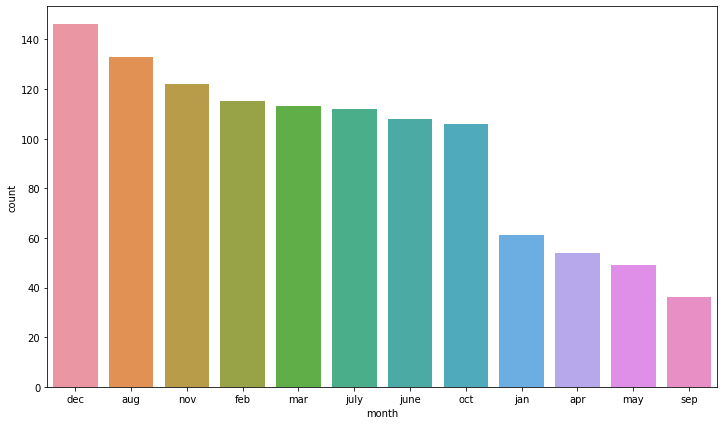

In [42]:
plt.figure(figsize =(12,7))
sns.countplot(df['month'],order = df['month'].value_counts().index)

In [43]:
def round(x):
    if x['START'] == x['STOP']:
        return 'yes'
    else:
        return 'no'

In [44]:
df['Round_trip'] = df.apply(round,axis=1)

<AxesSubplot:xlabel='Round_trip', ylabel='count'>

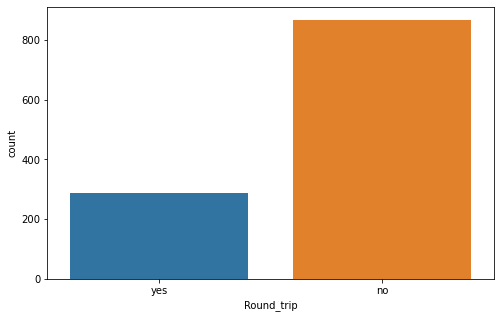

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(df['Round_trip'])

In [46]:
df['Round_trip'].value_counts()

no     867
yes    288
Name: Round_trip, dtype: int64

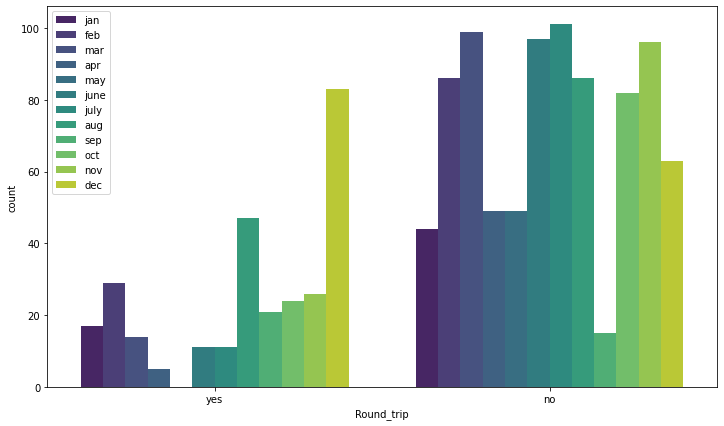

In [53]:
plt.figure(figsize=(12,7))
sns.countplot(df['Round_trip'],hue=df['month'],palette = 'viridis')
plt.legend()

In [54]:
a = df.groupby(['month','Round_trip']).agg({'Round_trip':'count'})

In [55]:
a.columns = ['countdata']

In [56]:
a =a.reset_index()

In [57]:
a

,month,Round_trip,countdata
0,apr,no,49
1,apr,yes,5
2,aug,no,86
3,aug,yes,47
4,dec,no,63
5,dec,yes,83
6,feb,no,86
7,feb,yes,29
8,jan,no,44
9,jan,yes,17


In [58]:
a[a['Round_trip']=='yes'].sort_values(by = ['countdata'],ascending=False)

,month,Round_trip,countdata
5,dec,yes,83
3,aug,yes,47
7,feb,yes,29
18,nov,yes,26
20,oct,yes,24
22,sep,yes,21
9,jan,yes,17
15,mar,yes,14
11,july,yes,11
13,june,yes,11


In [61]:
pd.set_option('display.max_rows',None)

In [62]:
df[df['month']=='dec'].groupby(['PURPOSE','month','Round_trip'])['month'].count()

PURPOSE          month  Round_trip
Airport/Travel   dec    yes            2
Between Offices  dec    yes            1
Customer Visit   dec    no            16
                        yes           10
Errand/Supplies  dec    no            11
                        yes           36
Meal/Entertain   dec    no            18
                        yes           13
Meeting          dec    no            12
                        yes           18
Temporary Site   dec    no             6
                        yes            3
Name: month, dtype: int64

<AxesSubplot:xlabel='minutes', ylabel='MILES'>

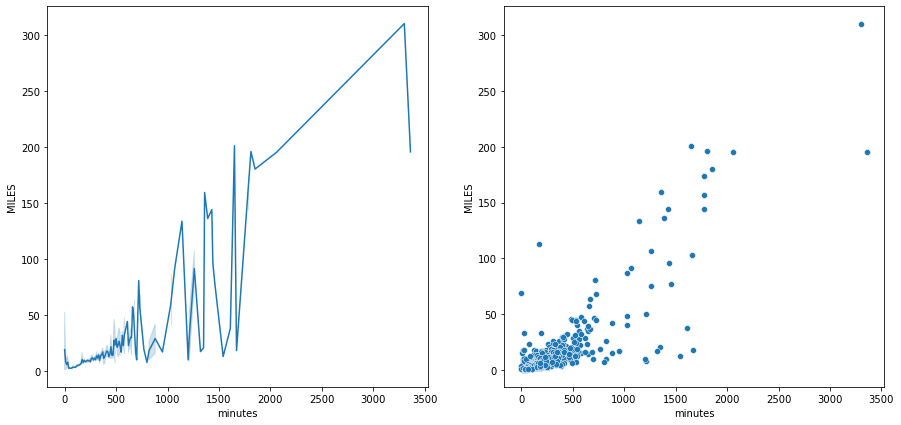

In [49]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.lineplot(data =df,x=df['minutes'],y=df['MILES'])
plt.subplot(1,2,2)
sns.scatterplot(data =df,x=df['minutes'],y=df['MILES'])


In [48]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,month,Round_trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,60.0,jan,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,120.0,jan,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,130.0,jan,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,140.0,jan,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,670.0,jan,no


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

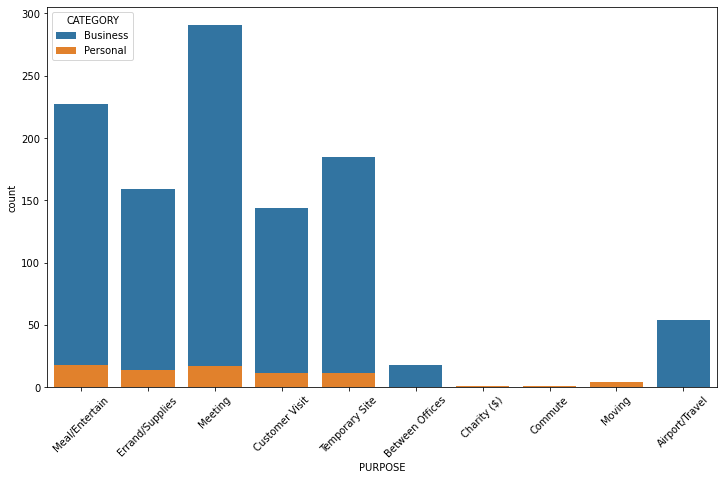

In [64]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.xticks(rotation=45)